In [1]:
import numpy as np
import pandas as pd

# from compiler.ast import flatten
from random import Random
from pandas import DataFrame
from numpy import log
from numpy import mat
from numpy import ones
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as pl
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


In [2]:
class adaboost (object):
    T=500
    m=0
    weakClassArr=[] #用来存基分类器的alpha
    weakalpha=[]    #用来存基分类器
    max_depth=0     #用来确定树的最大depth
    min_samples_split=2 
    def __init__(self,T,min_samples_split=2):
        self.T=T
        self.mins_sample_split=min_samples_split
        
    def fit(self,X_train,Y_train):
        self.max_depth=X_train.shape[1]
        m=X_data.shape[0]
        D=ones((m))/m
        epsilon = 0.001
        errorThreshold = 0.00001
        maybe=X_data.shape[1]

        for i in range(self.T):
            dt_stump=DecisionTreeClassifier(max_depth=maybe, 
                                            min_samples_split=self.min_samples_split)
            dt_stump.fit(X_data,Y_data,sample_weight=np.array(D))
            Y_pred=dt_stump.predict(X_data)
            error=mat(ones(m))
            error[mat(Y_pred)==mat(Y_data)]=0#error shape:(1,30621)
            
            error=D.T*error.T
            if error > 0.5:
                print("T = %d >0.5 break" % i)
                break
            if error < errorThreshold:
                print("T = %d <errorThreshold break" % i)
            
            alpha=float(0.5*log((1.0-error+epsilon)/(error+epsilon)))
            self.weakalpha.append(alpha)
            self.weakClassArr.append(dt_stump)

            D=D*\
                np.exp(-alpha*Y_pred*Y_data)
            #print(D.shape)
            D=np.ravel(D/D.sum())
            #print(D)
    
    def predict(self,X_test):
        data=mat(X_test)
        m=data.shape[0]
        Y_pred=mat(np.zeros((m,1)))
        
        
        for i in range (len(self.weakClassArr)):
            weak_result=self.weakalpha[i]*mat(self.weakClassArr[i].predict(X_test))
            
            Y_pred+=weak_result.T
            
        #return np.ravel(np.sign(Y_pred))
        return np.ravel(Y_pred) 
            
            
            
            
            
    

In [3]:
def get_data():  
    #adult_data.shape
    #adult2.test的数据是adult的数据删去label的最后一个字符"."得到的;
    adult_header=["age","workclass","fnlwgt","education","education-num",
              "marital-status","occupation","relationship","race","sex","capital-gain",
              "capital-loss","hours-per-week","native-country","label"]
    adult_data=pd.read_csv("./adult.data",index_col=False,names=adult_header)
    adult_test=pd.read_csv("./adult2.test",index_col=False,names=adult_header)
    #处理带有?的项目;
    adult_data[adult_data==" ?"]=np.nan
    adult_test[adult_test==" ?"]=np.nan
    adult_data.dropna(axis=0,how='any',inplace=True)
    adult_test.dropna(axis=0,how='any',inplace=True)
    #对非数值的数据进行处理;
    discre_name=["workclass","education","marital-status",
             "occupation","relationship","race",
             "sex","native-country","label"]
    for name in discre_name:
        key=np.unique(adult_data[name])
        #print(key)
        le=preprocessing.LabelEncoder()
        le.fit(key)
        adult_test[name]=le.transform(adult_test[name])
        adult_data[name]=le.transform(adult_data[name])
    #合并测试,训练两个数据集(之后用5-折交叉验证找)
    data = np.vstack((adult_data, adult_test))
    X = data[:, 0:-1]
    Y = data[:, -1]
    return X, Y
#print(adult_data)

In [4]:
# adult_header=["age","workclass","fnlwgt","education","education-num",
#               "marital-status","occupation","relationship","race","sex","capital-gain",
#               "capital-loss","hours-per-week","native-country","label"]
# adult_data=pd.read_csv("./adult.data",index_col=False,names=adult_header)
# adult_test=pd.read_csv("./adult2.test",index_col=False,names=adult_header)

In [5]:
#adult_data.shape
#adult2.test的数据是adult的数据删去label的最后一个字符"."得到的;

In [6]:
# adult_data[adult_data==" ?"]=np.nan
# adult_test[adult_test==" ?"]=np.nan
# #print(adult_data["age"])
# adult_data.dropna(axis=0,how='any',inplace=True)
# adult_test.dropna(axis=0,how='any',inplace=True)

In [7]:
#print(adult_data)
#print(adult_data.shape)


In [8]:
# discre_name=["workclass","education","marital-status",
#              "occupation","relationship","race",
#              "sex","native-country","label"]
# for name in discre_name:
#     key=np.unique(adult_data[name])
#     #print(key)
#     le=preprocessing.LabelEncoder()
#     le.fit(key)
#     adult_test[name]=le.transform(adult_test[name])
#     adult_data[name]=le.transform(adult_data[name])
# #print(adult_data)

In [9]:
# 我觉得可能还可以用one-hot的方法来处理类别;

/home/larryytr/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Adaboost:T=1: auc=0.785869 
Adaboost:T=2: auc=0.841477 
Adaboost:T=3: auc=0.867328 
Adaboost:T=4: auc=0.881332 
Adaboost:T=5: auc=0.895535 
Adaboost:T=6: auc=0.900111 
Adaboost:T=7: auc=0.913402 
Adaboost:T=8: auc=0.916953 
Adaboost:T=9: auc=0.922619 


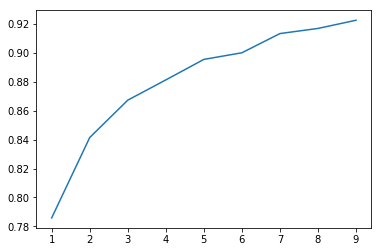

In [10]:
# X_data=np.array(adult_data.values[:,0:14])
# #print(X_data[:,0:14])
# Y_data=np.array(adult_data.values[:,14])
# #print(Y_data)
# X_test=np.array(adult_test.values[:,0:14])
# #print(X_test[:,0:14])
# Y_test=np.array(adult_test.values[:,14])
# X=np.vstack((X_data,X_test))
# Y=np.hstack((Y_data,Y_test))
X,Y=get_data()
test_num=5
plot_T=[]
plot_auc=[]
for t in range(1,10):
    serand=t
    mean_auc=0.0
#     mean_score=0.0
    for i in range(test_num):
        X_data,X_test,Y_data,Y_test=train_test_split(
                X, Y, test_size=.20, random_state=i*serand)
        Adaboost_classfier=adaboost(t*20,2)
        Adaboost_classfier.fit(X_data,Y_data)
        Y_pred=mat(Adaboost_classfier.predict(X_test))
        #y_pred=mat(Adaboost_classfier.predict(X_test))
        Y_pred.astype(np.int)
        Y_pred=np.array(np.ravel(Y_pred))
        Y_true=np.array(Y_test)
        precision, recall, thresholds = precision_recall_curve(Y_true,Y_pred)
        pr_auc = auc(recall, precision)
        mean_auc+=pr_auc
        Y_pred=np.sign(Y_pred)
#         score=accuracy_score(Y_test, Y_pred)
#         mean_score+=score
    plot_T.append(t*20)
    plot_auc.append(mean_auc/test_num)    
    print("Adaboost:T=%d: auc=%f "%(t*20,(mean_auc/test_num)))
# kf = KFold(n_splits=5,random_state=0)
pl.plot(plot_T,plot_auc)
# for train_index, test_index in kf.split(X):
#     print(train_index,test_index)
#     X_data=X[train_index]
#     X_test=X[test_index]
#     Y_data=Y[train_index]
#     Y_test=Y[test_index]
#     break;


In [11]:
# # m=X_data.shape[0]
# D=ones((m))/m
# min_max_scaler = preprocessing.MinMaxScaler()
# # B=min_max_scaler.fit_transform(D)
# print(D)
# dt_stump=DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
# dt_stump.fit(X_data,Y_data,sample_weight=D.T)
# error=mat(ones(m))
# error[mat(dt_stump.predict(X_data))==mat(Y_data)]=0
# print(error.T.shape)
# error=D.T*error.T
# B=ones((m,1))/m

# alpha=float(0.5*log((1.0-error)/max(error,1e-16)))
# weadsd=[]
# weadsd.append(dt_stump)
# expon=-1*alpha*mat(Y_data)*mat(dt_stump.predict(X_data)).T

# print("exp",np.exp(expon).shape)
# # D=np.multiply(D.T,np.exp(expon))
# print(mat(D))
# D=mat(D).T*np.exp(expon)
# print(D.shape)
# D=D/D.sum()

In [12]:
# num_of_classfier=1000
# Adaboost_classfier=adaboost(num_of_classfier,2)
# Adaboost_classfier.fit(X_data,Y_data)
# y_pred=mat(Adaboost_classfier.predict(X_test))
# y_pred.astype(np.int)
# y_pred=np.array(np.ravel(y_pred))
# print(np.ravel(y_pred))

# y_true=np.array(Y_test)
# #print(y_actual)
# precision, recall, thresholds = precision_recall_curve( y_true,y_pred)
# score=accuracy_score(y_true, y_pred)
# print(score)
# pr_auc = auc(recall, precision)
# test_auc =metrics.roc_auc_score(y_true, y_pred)#验证集上的auc值
# pl.plot(recall, precision)
# print("classfier_num",num_of_classfier)
# print("auc",roc_auc_score(y_true, y_pred))
# print("auc",test_auc)